In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
import tensorflow_hub as hub

import pandas as pd
import glob
import shutil

from tensorflow.keras import layers
print(tf.__version__)

2.3.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
from zipfile import ZipFile
file_name="/content/drive/My Drive/color.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:

dataset='/content/color/Apple___Apple_scab'

In [6]:
len(dataset)

33

In [7]:
import os

In [8]:
data=os.listdir('/content/color')
len(data)

38

In [9]:
apple_data=os.listdir('/content/color/Apple___Apple_scab')

In [10]:
len(apple_data)

630

In [11]:
image_paths=[]
for i in apple_data:
  image_paths.append(os.path.join('/content/color/Apple___Apple_scab',i))

In [12]:
image_paths[1]

'/content/color/Apple___Apple_scab/f1017472-d391-4a66-b9b2-d52916cd0c0b___FREC_Scab 3176.JPG'

In [13]:
img=plt.imread(image_paths[1])

In [14]:
dataset=os.listdir('/content/color')

In [15]:

len(dataset)

38

In [16]:
num_label=0
for example in dataset:
  num_label+=1

In [17]:
num_label

38

In [18]:
base_dir=os.listdir('/content/color')
len(base_dir)

38

In [19]:
classes=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Blueberry___healthy','Cherry_(including_sour)___Powdery_mildew','Cherry_(including_sour)___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Raspberry___healthy','Soybean___healthy','Squash___Powdery_mildew','Strawberry___Leaf_scorch','Strawberry___healthy','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy']

In [20]:
len(classes)

38

In [21]:
project_path='/content/color'
for cl in classes:
  images = glob.glob('/content/color'+'/'+cl+'/*.JPG')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.75)],images[round(len(images)*0.75):]
  
  for t in train:
    if not os.path.exists(os.path.join(project_path, 'train', cl)):
      os.makedirs(os.path.join(project_path, 'train', cl))
    shutil.move(t, os.path.join(project_path, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(project_path, 'val', cl)):
      os.makedirs(os.path.join(project_path, 'val', cl))
    shutil.move(v, os.path.join(project_path, 'val', cl))

Apple___Apple_scab: 630 Images
Apple___Black_rot: 621 Images
Apple___Cedar_apple_rust: 275 Images
Apple___healthy: 1645 Images
Blueberry___healthy: 1502 Images
Cherry_(including_sour)___Powdery_mildew: 1052 Images
Cherry_(including_sour)___healthy: 854 Images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 446 Images
Corn_(maize)___Common_rust_: 1192 Images
Corn_(maize)___Northern_Leaf_Blight: 870 Images
Corn_(maize)___healthy: 21 Images
Grape___Black_rot: 1180 Images
Grape___Esca_(Black_Measles): 1383 Images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076 Images
Grape___healthy: 423 Images
Orange___Haunglongbing_(Citrus_greening): 5507 Images
Peach___Bacterial_spot: 2297 Images
Peach___healthy: 360 Images
Pepper,_bell___Bacterial_spot: 997 Images
Pepper,_bell___healthy: 1476 Images
Potato___Early_blight: 1000 Images
Potato___Late_blight: 1000 Images
Potato___healthy: 152 Images
Raspberry___healthy: 371 Images
Soybean___healthy: 5090 Images
Squash___Powdery_mildew: 1813 Images
Str

In [22]:
train_dir=os.listdir('/content/color/train')
val_dir=os.listdir('/content/color/val')

In [23]:
len(train_dir)
len(val_dir)

38

In [24]:
IMG_SHAPE=256
BATCH_SIZE=32

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)

In [26]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
        directory='/content/color/train',
        shuffle=True,
        target_size=(IMG_SHAPE,IMG_SHAPE),
        class_mode='sparse')

Found 39600 images belonging to 38 classes.


In [27]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
        directory='/content/color/val',
        shuffle=False,
        target_size=(IMG_SHAPE,IMG_SHAPE),
        class_mode='sparse')

Found 13203 images belonging to 38 classes.


In [28]:
train_dir[0]

'Grape___healthy'

In [29]:
URL = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [30]:
feature_extractor.trainable=False

In [31]:
model=tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(38,activation='softmax')
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 38)                77862     
Total params: 21,880,646
Trainable params: 77,862
Non-trainable params: 21,802,784
_________________________________________________________________


In [33]:
model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [34]:
EPOCHS=6
history=model.fit_generator(
                   train_data_gen,
                   epochs=EPOCHS,
                   validation_data=val_data_gen)

Epoch 1/6
1238/1238 [==============================] - 151s 122ms/step - loss: 0.6310 - accuracy: 0.8303 - val_loss: 0.3514 - val_accuracy: 0.8941
Epoch 2/6
1238/1238 [==============================] - 151s 122ms/step - loss: 0.2682 - accuracy: 0.9202 - val_loss: 0.2951 - val_accuracy: 0.9079
Epoch 3/6
1238/1238 [==============================] - 150s 121ms/step - loss: 0.2036 - accuracy: 0.9381 - val_loss: 0.2477 - val_accuracy: 0.9228
Epoch 4/6
1238/1238 [==============================] - 150s 121ms/step - loss: 0.1659 - accuracy: 0.9493 - val_loss: 0.2400 - val_accuracy: 0.9218
Epoch 5/6
1238/1238 [==============================] - 150s 122ms/step - loss: 0.1402 - accuracy: 0.9568 - val_loss: 0.2244 - val_accuracy: 0.9288
Epoch 6/6
1238/1238 [==============================] - 150s 121ms/step - loss: 0.1227 - accuracy: 0.9616 - val_loss: 0.2433 - val_accuracy: 0.9225


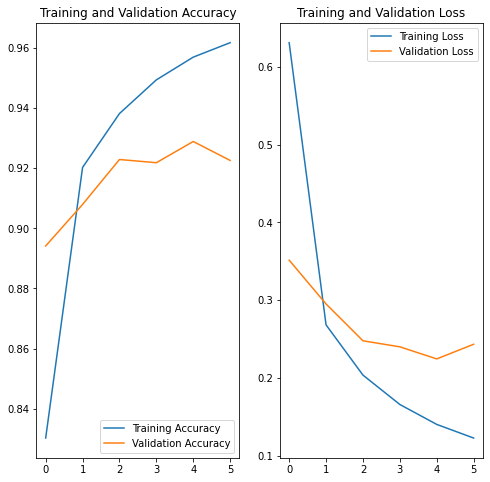

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()